In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

def custom_activation(x):
    return tf.nn.leaky_relu(x, alpha=0.2)

def train_model(activation_type, value):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(64, activation=custom_activation),
        tf.keras.layers.Dense(64, activation=custom_activation),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    if activation_type == 'dropout':
        model.add(tf.keras.layers.Dropout(value))
        model.add(tf.keras.layers.Dropout(value))
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    elif activation_type == 'clipout':
        opt = tf.keras.optimizers.Adam(clipvalue=value)
        model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=0)
    _, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    return test_accuracy

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

dropout_probs = [0.1, 0.2, 0.3, 0.4, 0.5]
clipout_values = [0.1, 0.2, 0.3, 0.4, 0.5]

dropout_accuracies = []
clipout_accuracies = []

for dropout_prob in dropout_probs:
    accuracy = train_model('dropout', dropout_prob)
    dropout_accuracies.append(accuracy)

for clipout_value in clipout_values:
    accuracy = train_model('clipout', clipout_value)
    clipout_accuracies.append(accuracy)

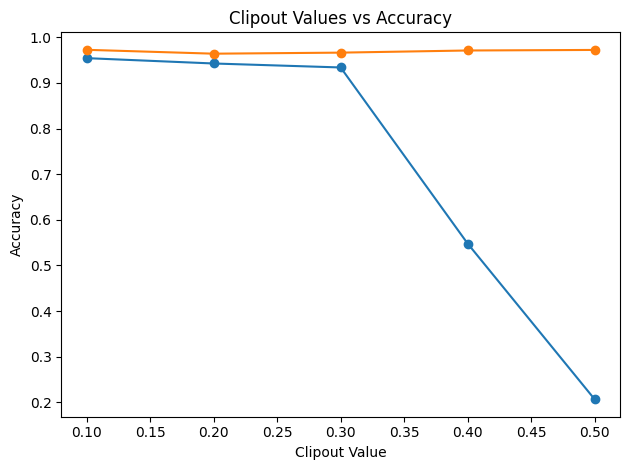

In [8]:
plt.plot(dropout_probs, dropout_accuracies, marker='o')
plt.title('Dropout Probabilities vs Accuracy')
plt.xlabel('Dropout Probability')
plt.ylabel('Accuracy')

plt.plot(clipout_values, clipout_accuracies, marker='o')
plt.title('Clipout Values vs Accuracy')
plt.xlabel('Clipout Value')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()